In [1]:
#initialize 

import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
#****would have to change paths for reading in the data

In [3]:
#Read in dataframe1
data = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/GROSSMOVIES.csv")
df1 = pd.DataFrame(data, columns=['Title', 'World Sales (in $)'])
print(df1)

                                           Title  World Sales (in $)
0    Star Wars: Episode VII - The Force Awakens           2069521700
1                             Avengers: Endgame           2797501328
2                                        Avatar           2847246203
3                                 Black Panther           1347597973
4                        Avengers: Infinity War           2048359754
..                                           ...                 ...
913                                The Notebook            117815157
914                   Jimmy Neutron: Boy Genius            102992536
915                               Eat Pray Love            204594016
916                 The Texas Chainsaw Massacre            107363905
917                                   Zookeeper            169852759

[918 rows x 2 columns]


In [4]:
#Read in dataframe 2
data = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/IMDBMOVIES.csv")
df2 = pd.DataFrame(data, columns=[ "Title", 'IMDB_Rating', "Runtime", 'Genre', 'Director'])
print(df2)

                        Title  IMDB_Rating  Runtime                     Genre  \
0    The Shawshank Redemption          9.3  142 min                     Drama   
1               The Godfather          9.2  175 min              Crime, Drama   
2             The Dark Knight          9.0  152 min      Action, Crime, Drama   
3      The Godfather: Part II          9.0  202 min              Crime, Drama   
4                12 Angry Men          9.0   96 min              Crime, Drama   
..                        ...          ...      ...                       ...   
995    Breakfast at Tiffany's          7.6  115 min    Comedy, Drama, Romance   
996                     Giant          7.6  201 min            Drama, Western   
997     From Here to Eternity          7.6  118 min       Drama, Romance, War   
998                  Lifeboat          7.6   97 min                Drama, War   
999              The 39 Steps          7.6   86 min  Crime, Mystery, Thriller   

                 Director  

In [5]:
#Strip any potential white space from movie titles
df1['Title'] = df1['Title'].str.strip()

In [6]:
#Merging data on an inner join
dfmerge = pd.merge(df1, df2, on="Title", how="inner")
print(dfmerge)

                                          Title  World Sales (in $)  \
0    Star Wars: Episode VII - The Force Awakens          2069521700   
1                             Avengers: Endgame          2797501328   
2                                        Avatar          2847246203   
3                        Avengers: Infinity War          2048359754   
4                                       Titanic          2201647264   
..                                          ...                 ...   
180                                    Die Hard           141603197   
181                              Apocalypse Now            92158064   
182                          Brokeback Mountain           178062759   
183                                       Alien           106285522   
184                                The Notebook           117815157   

     IMDB_Rating  Runtime                       Genre              Director  
0            7.9  138 min   Action, Adventure, Sci-Fi           J.J. 

In [7]:
#Count number of genres
pie1 = dfmerge.value_counts('Genre')
pie1.head(15)

Genre
Animation, Adventure, Comedy    16
Action, Adventure, Sci-Fi       14
Drama, Romance                   8
Action, Adventure, Drama         7
Animation, Action, Adventure     7
Action, Adventure, Comedy        6
Crime, Drama, Mystery            4
Biography, Drama, History        4
Crime, Drama, Thriller           4
Drama                            4
Adventure, Family, Fantasy       4
Action, Adventure, Fantasy       4
Action, Crime, Drama             3
Biography, Drama                 3
Drama, Western                   3
dtype: int64

array([<AxesSubplot:ylabel='Genre Quantity'>], dtype=object)

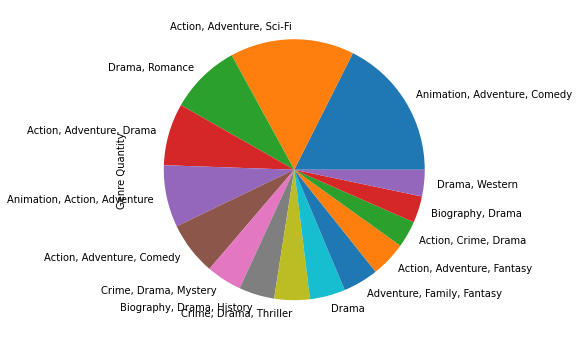

In [8]:
#Visualization of genre counts
pie1 = dfmerge.value_counts('Genre')
pie1.iloc[0:15].plot(kind = "pie", ylabel = "Genre Quantity", subplots=True, figsize=(11, 6))

In [9]:
#Count number of Directors
pie2 = dfmerge.value_counts('Director')
pie2.head(15)

Director
Steven Spielberg     8
Christopher Nolan    6
Robert Zemeckis      5
David Fincher        5
Ridley Scott         5
Peter Jackson        5
Sam Mendes           4
Clint Eastwood       4
Anthony Russo        4
James Cameron        4
David Yates          3
Ron Clements         3
Quentin Tarantino    3
Brad Bird            3
J.J. Abrams          3
dtype: int64

array([<AxesSubplot:ylabel='Director Quantity'>], dtype=object)

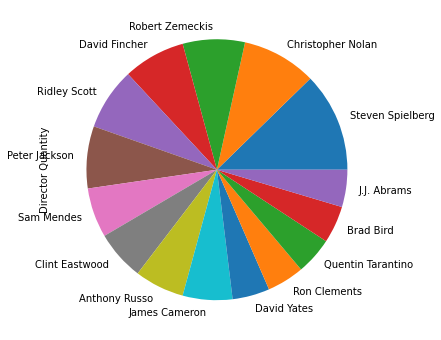

In [10]:
#Visualization of directors counts
pie2 = dfmerge.value_counts('Director')
pie2.iloc[0:15].plot(kind = "pie", ylabel = "Director Quantity", subplots=True, figsize=(11, 6))

In [11]:
#Group aggregation by Genre
group1 = dfmerge.groupby('Genre').agg('mean')

In [12]:
#Display number information from Group aggregation
visual1 = group1.sort_values(by=['World Sales (in $)']).tail(10)
visual2 = group1.sort_values(by=['IMDB_Rating']).tail(10)
print(visual1)
print(visual2)


                             World Sales (in $)  IMDB_Rating
Genre                                                       
Action, Adventure, Thriller        8.389099e+08     7.800000
Animation, Family, Fantasy         8.492719e+08     8.000000
Action, Adventure, Sci-Fi          8.883835e+08     8.028571
Adventure, Family, Fantasy         9.219741e+08     7.725000
Action, Adventure, Family          9.344541e+08     7.600000
Adventure, Drama, Fantasy          9.756691e+08     8.000000
Adventure, Fantasy                 9.880055e+08     7.800000
Action, Adventure, Drama           1.071099e+09     8.414286
Action, Adventure, Fantasy         1.128748e+09     8.200000
Animation, Adventure, Drama        1.363256e+09     8.500000
                             World Sales (in $)  IMDB_Rating
Genre                                                       
Drama, Thriller, War               3.849194e+08     8.300000
Crime, Drama, Thriller             4.549073e+08     8.325000
Drama, War              

<AxesSubplot:xlabel='Genre'>

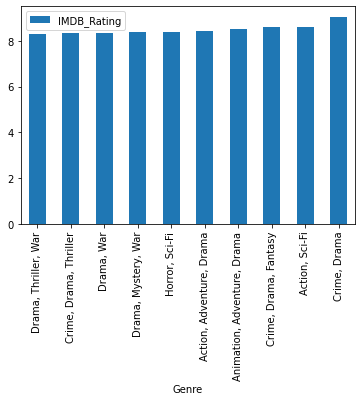

In [13]:
#Vizualtion for Genre Group Aggregation on Rating
visual2.iloc[0:11].plot(y="IMDB_Rating", kind='bar', rot=90)

<AxesSubplot:xlabel='Genre'>

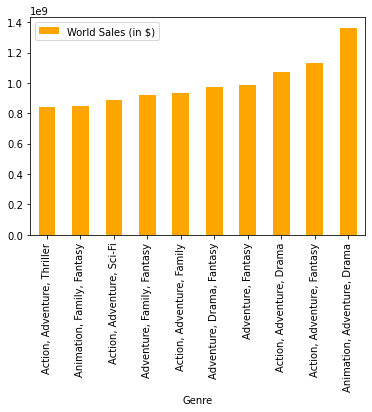

In [14]:
#Vizualtion for Genre Group Aggregation for Sales
visual1.iloc[0:11].plot(y="World Sales (in $)", kind='bar', rot=90, color="orange")

In [15]:
#Group aggregation and number information for Directors
group2 = dfmerge.groupby('Director').agg('mean')
visual3 = group2.sort_values(by=['World Sales (in $)']).tail(10)
visual4 = group2.sort_values(by=['IMDB_Rating']).tail(10)
print(visual3)
print(visual4)

                     World Sales (in $)  IMDB_Rating
Director                                            
Wolfgang Reitherman        9.665549e+08     7.600000
J.J. Abrams                9.741891e+08     7.833333
Peter Jackson              9.934454e+08     8.400000
Byron Howard               1.024121e+09     8.000000
Josh Cooley                1.073395e+09     7.800000
David Yates                1.084606e+09     7.800000
Roger Allers               1.363256e+09     8.500000
James Cameron              1.425209e+09     8.100000
Joss Whedon                1.518816e+09     8.000000
Anthony Russo              1.678405e+09     8.075000
                      World Sales (in $)  IMDB_Rating
Director                                             
Peter Jackson               9.934454e+08     8.400000
Bob Persichetti             3.755408e+08     8.400000
Christopher Nolan           7.543934e+08     8.466667
Roger Allers                1.363256e+09     8.500000
Quentin Tarantino           3.204870e+08

<AxesSubplot:xlabel='Director'>

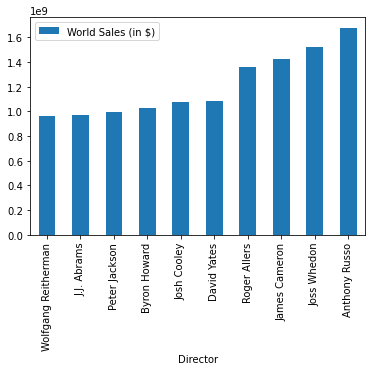

In [16]:
#Vizualtion for Director Group Aggregation for Sales
visual3.iloc[0:11].plot(y="World Sales (in $)", kind='bar', rot=90)

<AxesSubplot:xlabel='Director'>

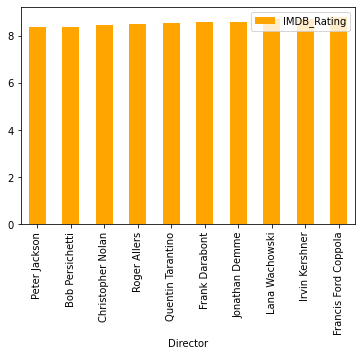

In [17]:
#Vizualtion for Director Group Aggregation for Sales
visual4.iloc[0:11].plot(y="IMDB_Rating", kind='bar', rot=90, color="orange")

In [18]:
#Train data for log regression
trainimdb = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/imdbtrain.csv")

In [19]:
#Test data for log regression
testimdb = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/imdbtest.csv")

In [20]:
#Setting my predictor for runtime and creating dummies
predictors = ["Runtime"]

x_train = pd.get_dummies(trainimdb[predictors], drop_first=True)
y_train = trainimdb["GoodMovie"]
x_test = pd.get_dummies(testimdb[predictors])

In [21]:
#Display Accuracy Score
my_lr = LogisticRegression(max_iter=200).fit(x_train, y_train)
lr_pred_train = my_lr.predict(x_train)
metrics.accuracy_score(y_train, lr_pred_train)

0.6861435726210351

In [22]:
#Display Confusion Matrix
metrics.confusion_matrix(y_train, lr_pred_train)

array([[400,  13],
       [175,  11]], dtype=int64)

In [23]:
#Run regression predictions
lr_pred_test = my_lr.predict(x_test)

In [24]:
#Creating output files
lr_output = pd.DataFrame(lr_pred_test,
                      index=x_test.index,
                      columns=["Goodmovie"])
lr_output.to_csv("C:/Users/mccla/Desktop/INFO450Final/lr_predict.csv")

In [25]:
#Reading the regression results
runreg = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/RuntimeResult.csv")

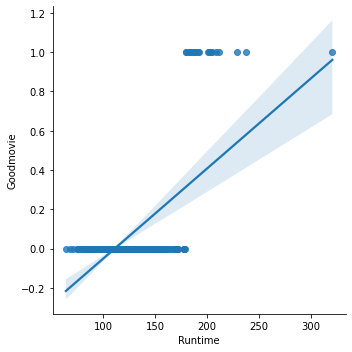

In [26]:
#Displaying Regression Results
sns.lmplot(x='Runtime',y='Goodmovie',data=runreg,fit_reg=True) 

In [27]:
#Train data for decision tree
traindt = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/imdbtrain.csv")

In [28]:
#Test data for decision tree
testdt = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/imdbtest.csv")

In [29]:
#Setting my predictor for runtime and creating dummies
predictors = ["Runtime"]

x_train = pd.get_dummies(trainimdb[predictors], drop_first=True)
y_train = trainimdb["GoodMovie"]
x_test = pd.get_dummies(testimdb[predictors])

In [30]:
#Display Accuracy Score
my_tree = DecisionTreeClassifier().fit(x_train, y_train)
tree_pred_train = my_tree.predict(x_train)
metrics.accuracy_score(y_train, tree_pred_train)

0.7629382303839732

In [31]:
#Display Confusion Matrix
pd.DataFrame(metrics.confusion_matrix(y_train, tree_pred_train, normalize="true"))

,0,1
0,0.958838,0.041162
1,0.672043,0.327957


In [32]:
#Run decision tree predictions
tree_pred_test = my_tree.predict(x_test)

In [33]:
#Creating output files
tree_output = pd.DataFrame(tree_pred_test,
                      index=x_test.index,
                      columns=["Goodmovie"])
tree_output.to_csv("C:/Users/mccla/Desktop/INFO450Final/dt_predict.csv")

In [34]:
#Reading the decision tree results
rundt = pd.read_csv("C:/Users/mccla/Desktop/INFO450Final/RuntimeDT.csv")
print(runreg)

     Runtime  Goodmovie
0        100          0
1        134          0
2        132          0
3        105          0
4        140          0
..       ...        ...
396      202          1
397      108          0
398      178          0
399       93          0
400      156          0

[401 rows x 2 columns]


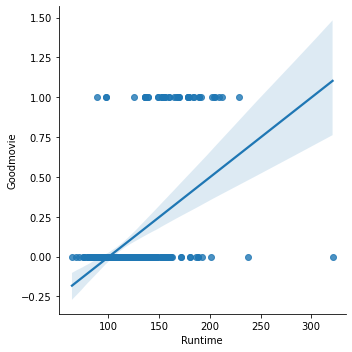

In [35]:
#Displaying Decision Tree
sns.lmplot(x='Runtime', y='Goodmovie', data=rundt, fit_reg=True) 